Detected 34 regions (excluding background)


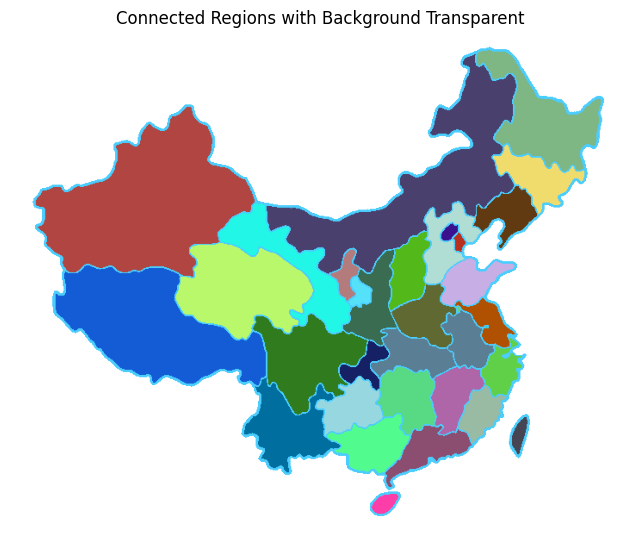

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取并预处理图像
img = cv2.imread('assets/map.png', cv2.IMREAD_GRAYSCALE)
# 反转、阈值，得到只有黑线（255）和白底（0）
img = 255 - img
img[img <= 150] = 0
img[img > 150] = 255

# 2. 二值化并连通域标记
_, binary = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
num_labels, labels = cv2.connectedComponents(binary)
print(f"Detected {num_labels-1} regions (excluding background)")

# 3. 为每个标签创建随机颜色（BGR）
h, w = labels.shape
np.random.seed(123)  # 保证可复现
colors = np.random.randint(0, 256, size=(num_labels, 3), dtype=np.uint8)

# 假设标签1是背景，则把 colors[1] 设为白色
colors[1] = [255, 255, 255]

# 4. 构建 RGBA 图像
rgba = np.zeros((h, w, 4), dtype=np.uint8)

# a) 填充 BGR 通道
for lbl in range(num_labels):
    mask = (labels == lbl)
    rgba[..., :3][mask] = colors[lbl]

# b) 填充 alpha 通道：
#    - 对应背景的标签 1 设为透明 (0)
#    - 其余标签设为不透明 (255)
rgba[..., 3] = np.where(labels == 1, 0, 255)

# 5. 保存带透明通道的 PNG
cv2.imwrite('regions_transparent.png', rgba)

# 6. 可视化
plt.figure(figsize=(8, 8))
# matplotlib expects RGBA ordering
plt.imshow(rgba[..., [2,1,0,3]])  # BGR->RGB, plus alpha
plt.axis('off')
plt.title('Connected Regions with Background Transparent')
plt.show()

# 7. （可选）输出每个连通区的坐标数组
regions = {
    lbl: np.column_stack(np.where(labels == lbl))
    for lbl in range(num_labels) if lbl != 1
}


i 0


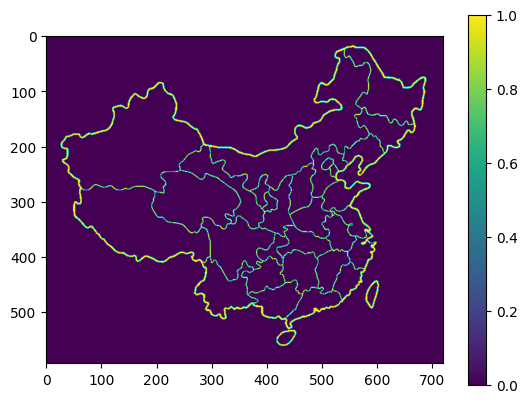

i 1


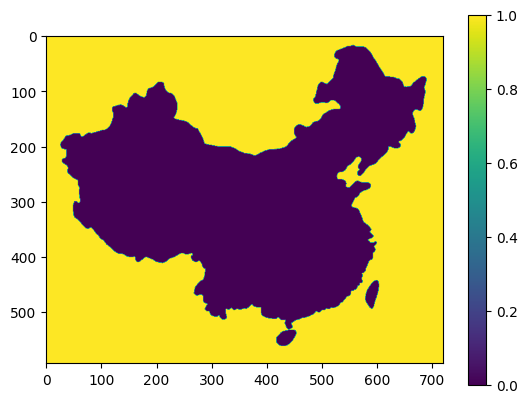

i 2


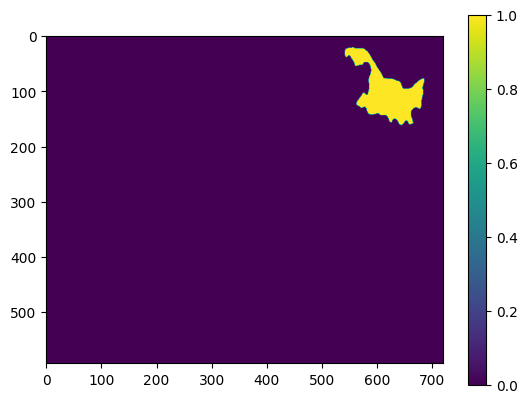

i 3


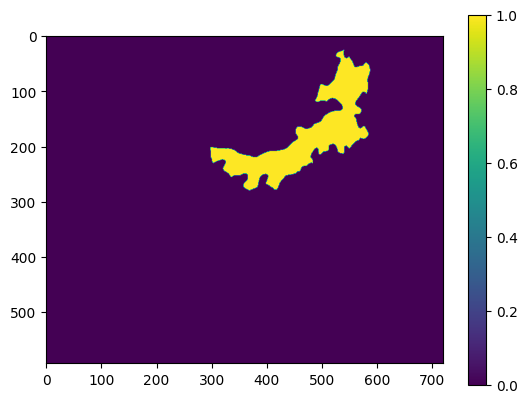

i 4


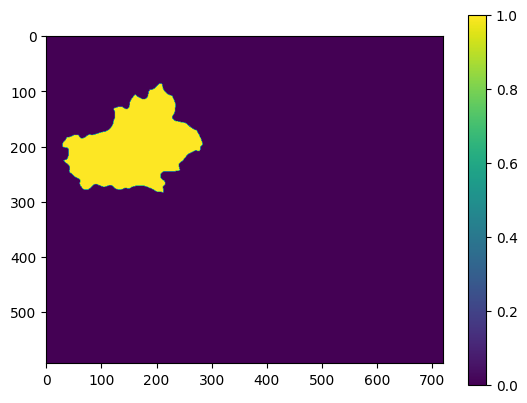

i 5


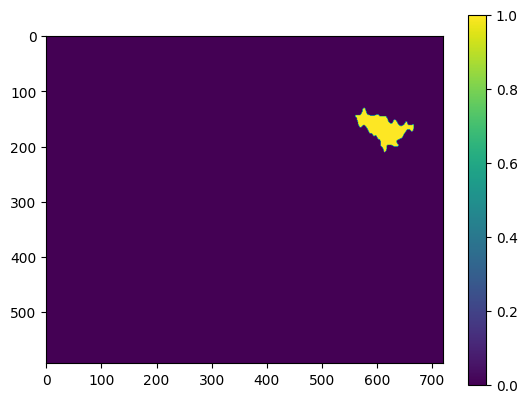

i 6


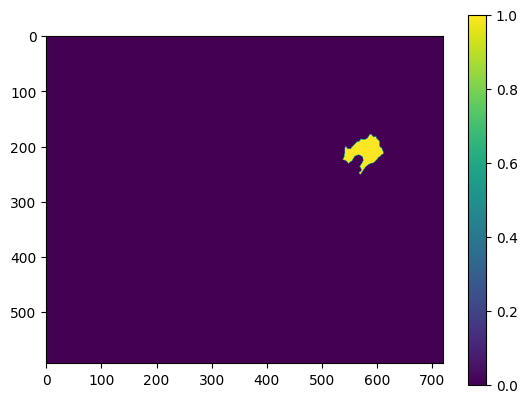

i 7


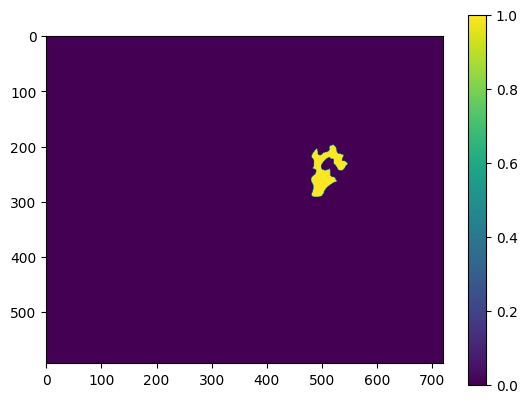

i 8


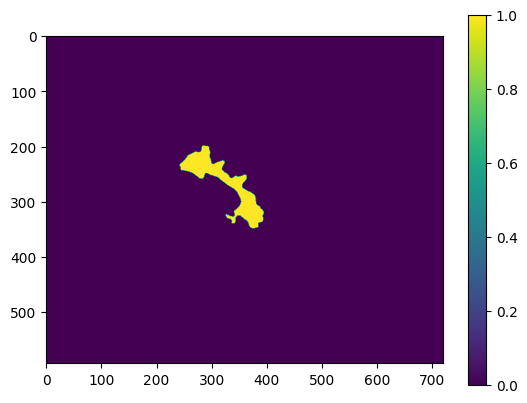

i 9


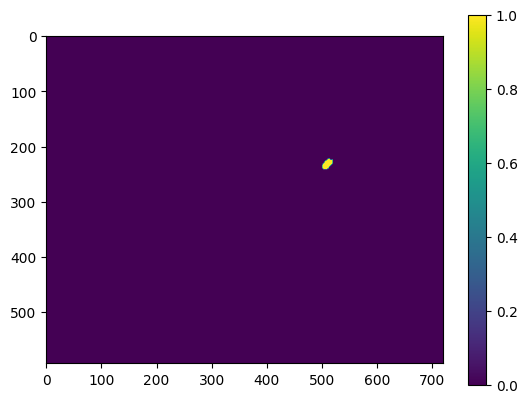

i 10


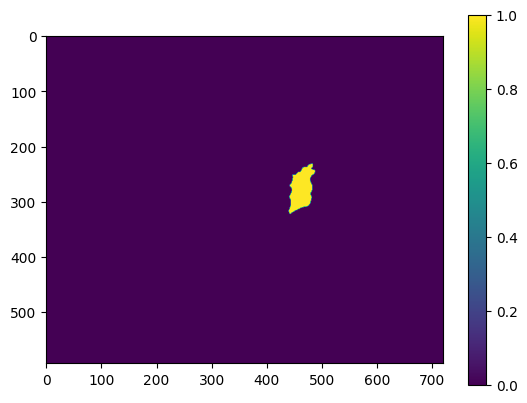

i 11


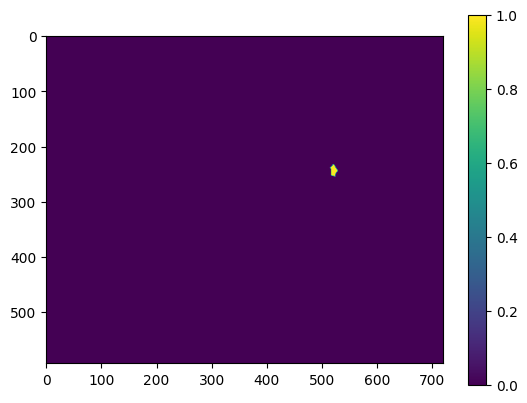

i 12


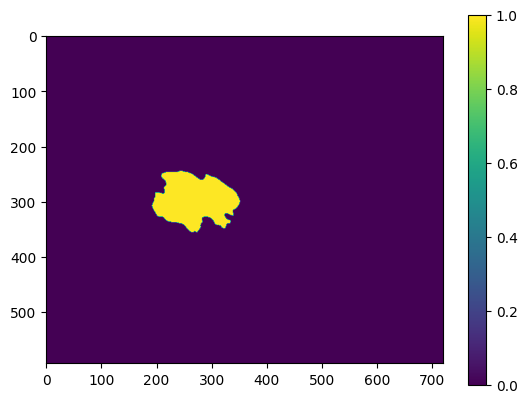

i 13


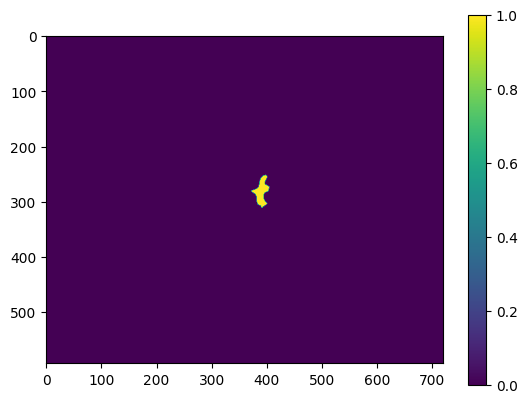

i 14


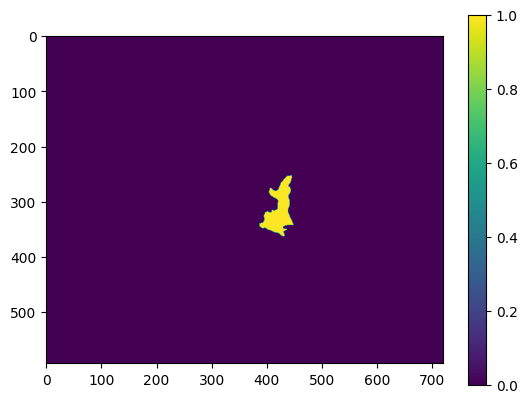

i 15


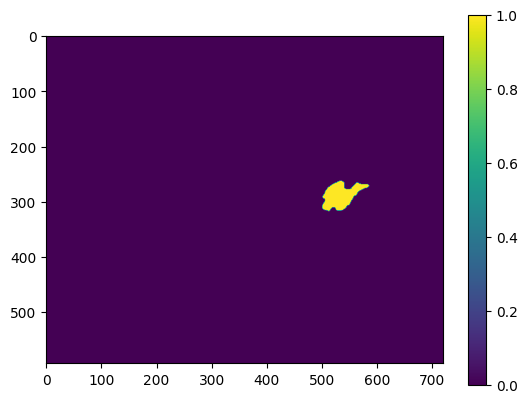

i 16


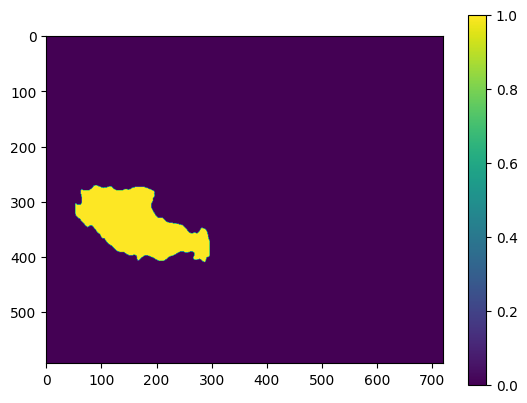

i 17


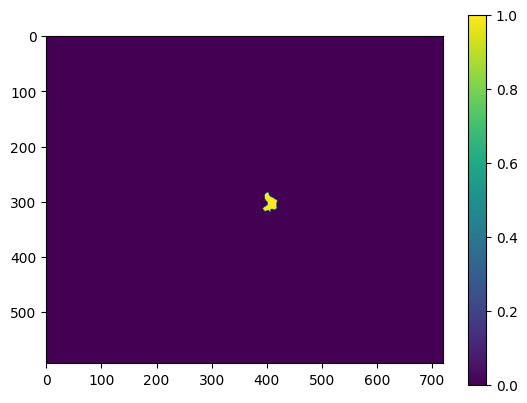

i 18


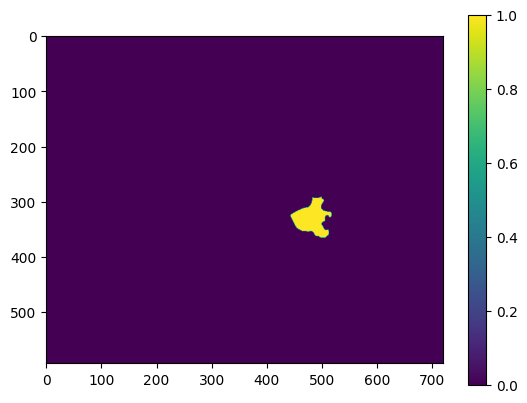

i 19


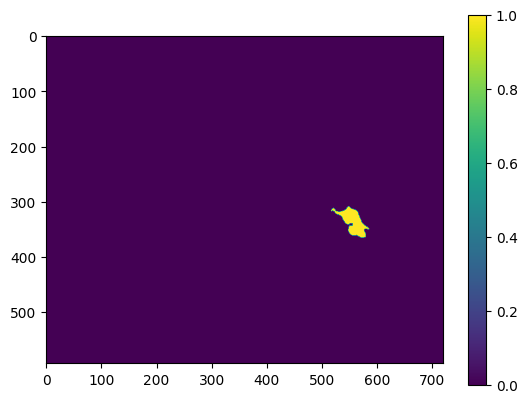

i 20


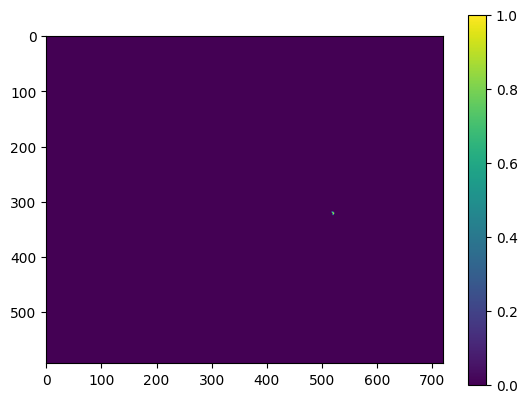

i 21


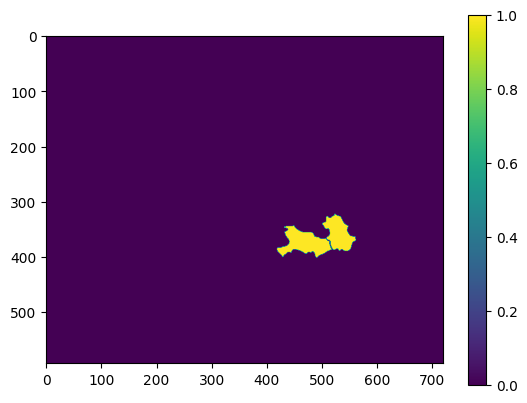

i 22


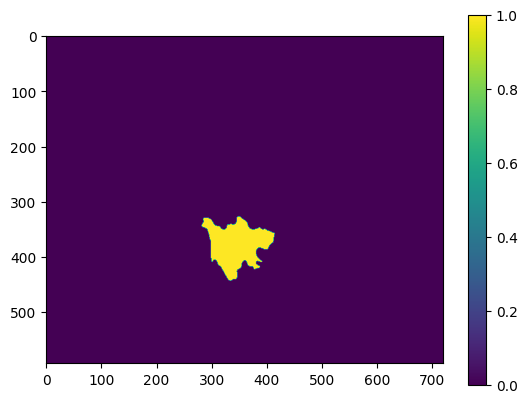

i 23


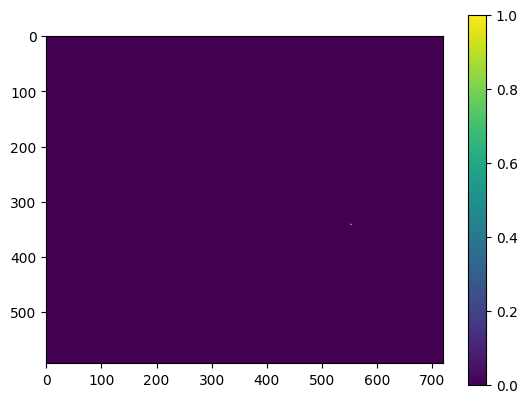

i 24


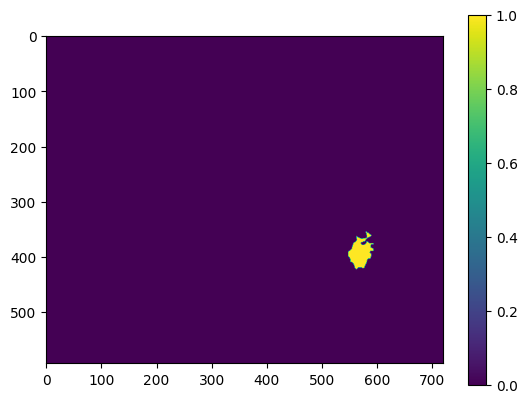

i 25


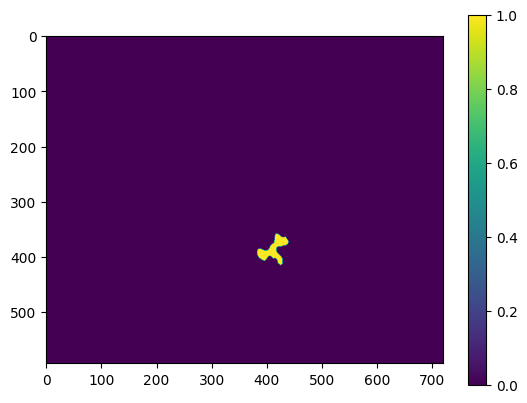

i 26


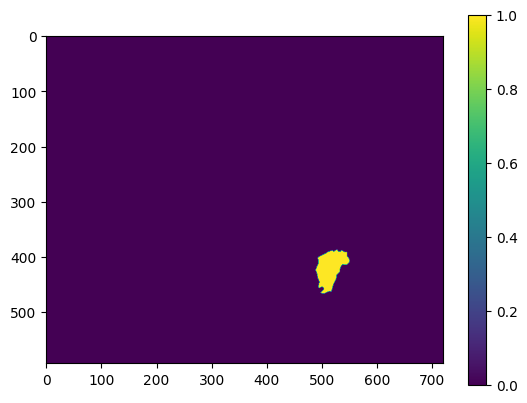

i 27


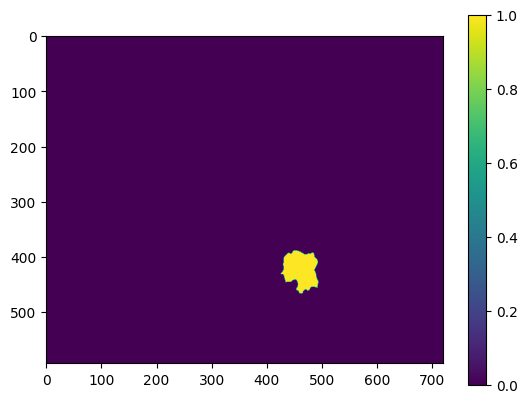

i 28


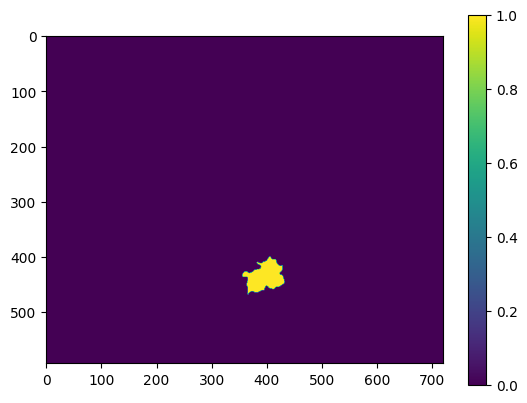

i 29


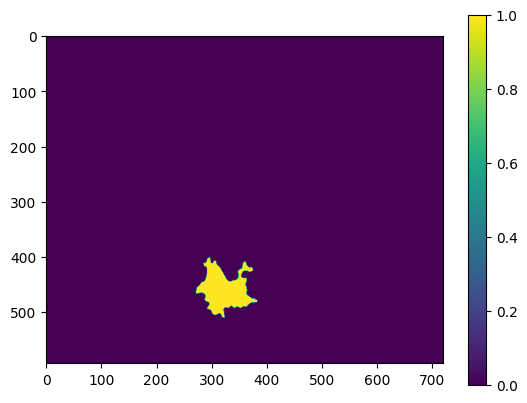

i 30


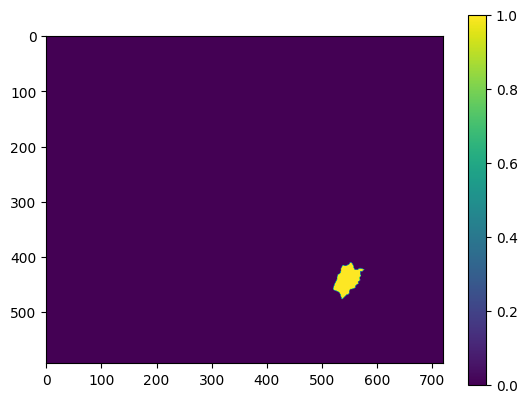

i 31


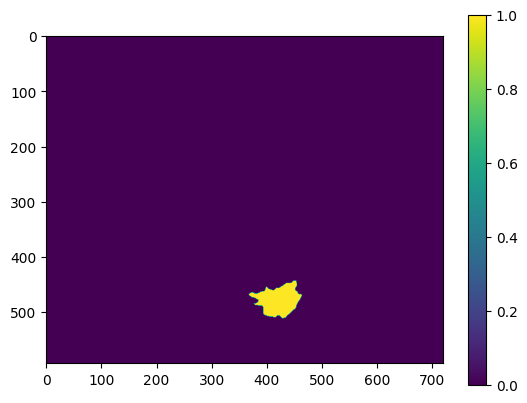

i 32


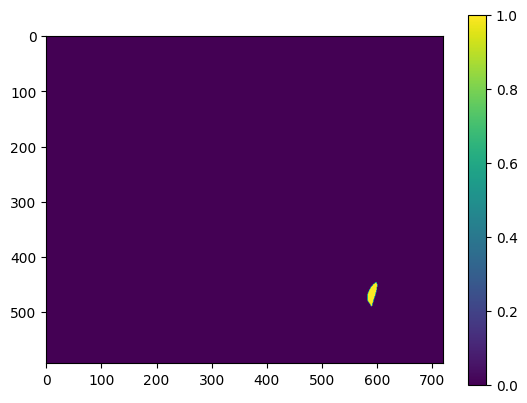

i 33


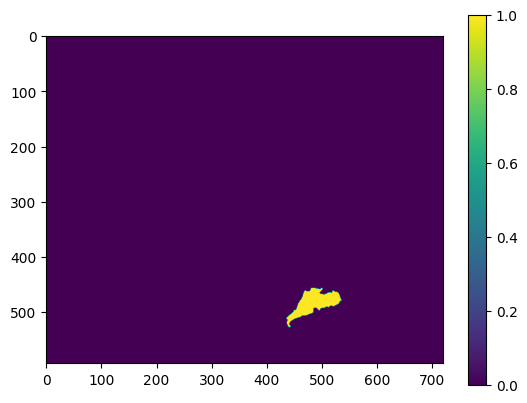

i 34


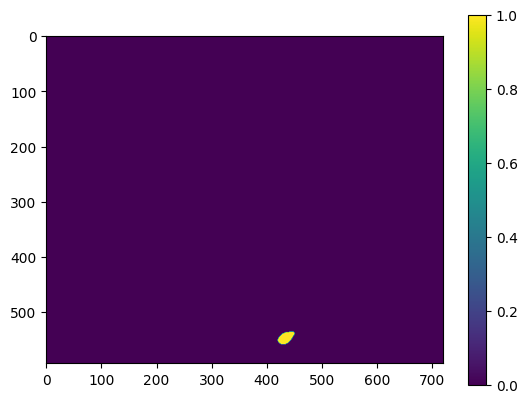

In [27]:
import numpy as np

for i in range(num_labels):
    print('i', i)
    plt.imshow(labels==i)
    plt.colorbar()
    plt.show()

In [19]:
img.shape

(594, 720)

In [18]:
np.unique(img)

array([  0, 255], dtype=uint8)